In [12]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Ashvita Yadav\OneDrive\Desktop\Wine Quality.csv') 

In [14]:
print(df.head())
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [16]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

In [18]:
# Find Duplicates
df = df.dropna()
print(f'Duplicates: {df.duplicated().sum()}')
# Remove Duplicates
df = df.drop_duplicates()

Duplicates: 240


In [20]:
import numpy as np

for column in df.columns[:-1]: 
    mean_value = np.mean(df[column])
    median_value = np.median(df[column])
    std_dev = np.std(df[column])
    print(f'{column}: Mean = {mean_value}, Median = {median_value}, Std Dev = {std_dev}')

correlation_matrix = df.corr()

print(correlation_matrix)

fixed acidity: Mean = 8.310596026490067, Median = 7.9, Std Dev = 1.7363506208291186
volatile acidity: Mean = 0.5294775570272259, Median = 0.52, Std Dev = 0.1829639647860207
citric acid: Mean = 0.2723325974981604, Median = 0.26, Std Dev = 0.1954645899778158
residual sugar: Mean = 2.5233995584988964, Median = 2.2, Std Dev = 1.351816126135995
chlorides: Mean = 0.08812362030905076, Median = 0.079, Std Dev = 0.04935869248429017
free sulfur dioxide: Mean = 15.893303899926417, Median = 14.0, Std Dev = 10.443425817240861
total sulfur dioxide: Mean = 46.82597498160412, Median = 38.0, Std Dev = 33.39665170594024
density: Mean = 0.9967089477557026, Median = 0.9967, Std Dev = 0.0018682293985404315
pH: Mean = 3.309786607799853, Median = 3.31, Std Dev = 0.15497926020485372
sulphates: Mean = 0.6587049300956587, Median = 0.62, Std Dev = 0.1706040876684653
alcohol: Mean = 10.432315428010792, Median = 10.2, Std Dev = 1.0816672657685624
                      fixed acidity  volatile acidity  citric acid  

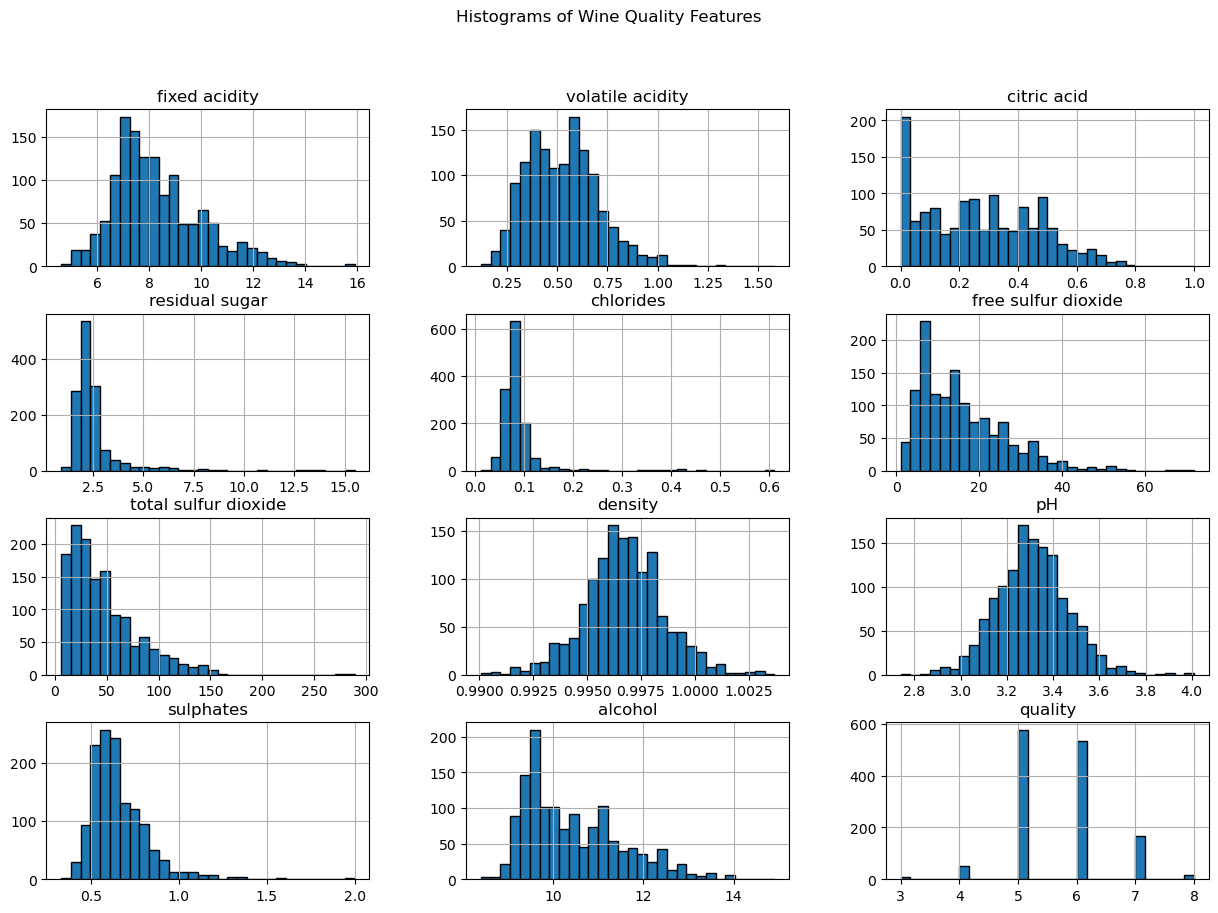

In [22]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Wine Quality Features')
plt.show()


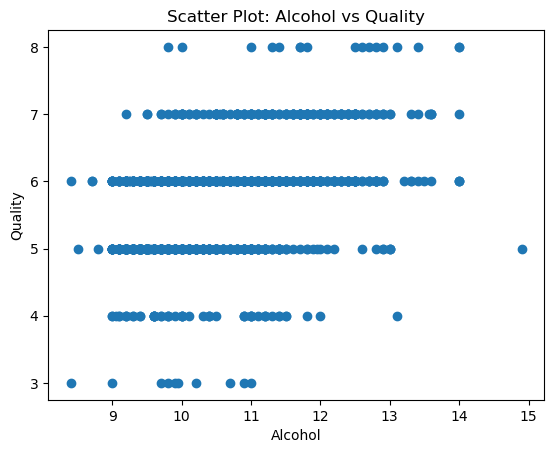

In [23]:
# Scatter plot between Alcohol and Quality
plt.scatter(df['alcohol'], df['quality'])
plt.title('Scatter Plot: Alcohol vs Quality')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

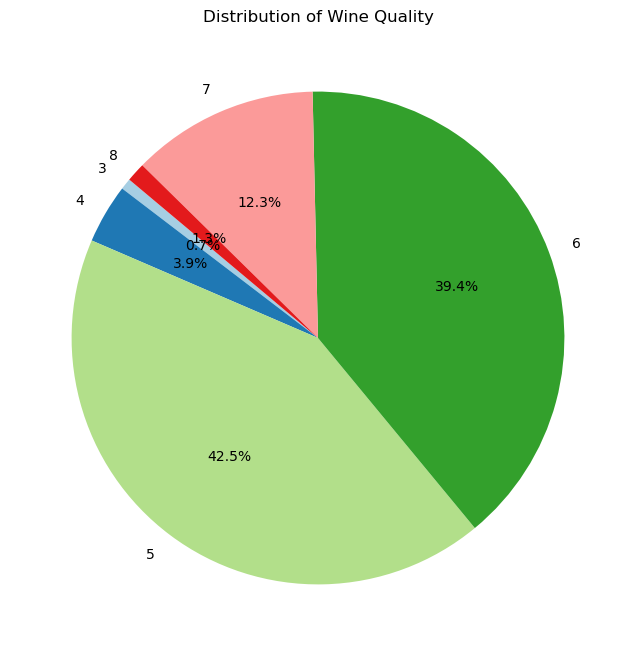

In [32]:
import matplotlib.pyplot as plt

quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Distribution of Wine Quality')
plt.show()

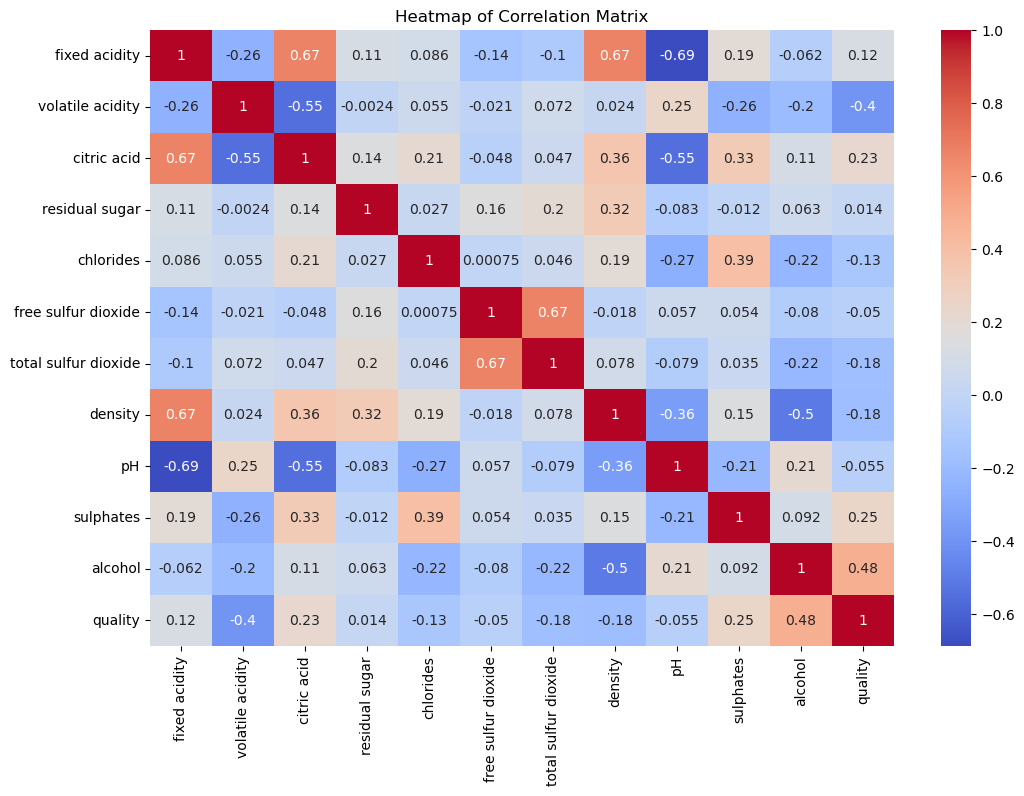

In [26]:
import seaborn as sns

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

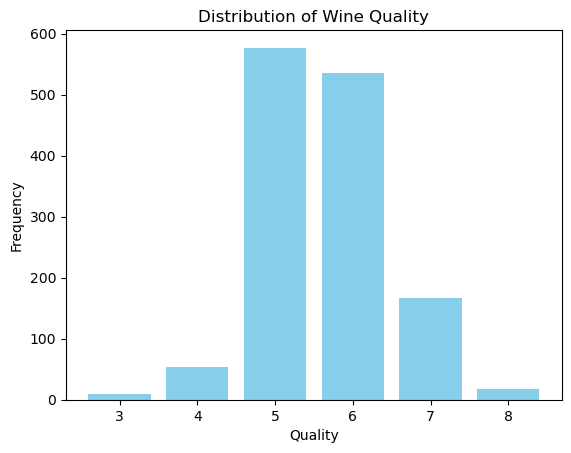

In [30]:
# Distribution of wine quality
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='skyblue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

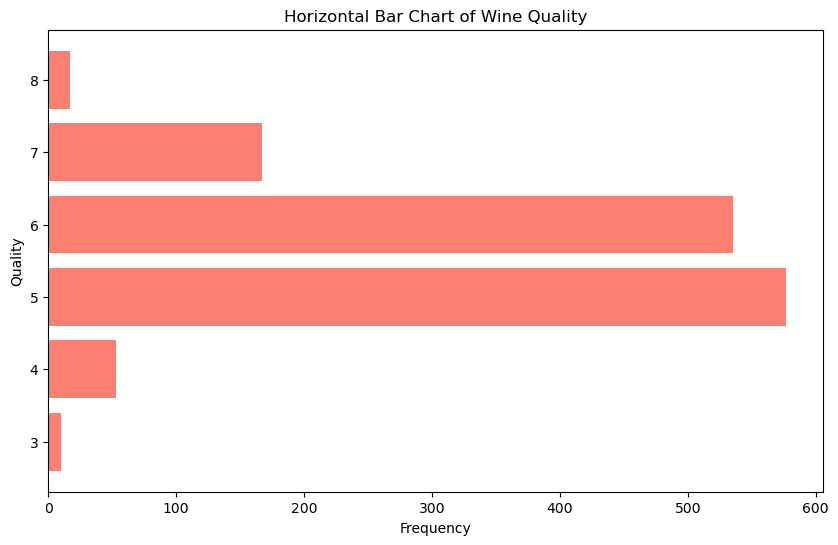

In [36]:
# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(quality_counts.index, quality_counts.values, color='salmon')
plt.title('Horizontal Bar Chart of Wine Quality')
plt.xlabel('Frequency')
plt.ylabel('Quality')
plt.show()


C:\Users\Ashvita Yadav\AppData\Local\Temp\ipykernel_29040\3507917425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_data = df.groupby([alcohol_bins, 'quality']).size().unstack()


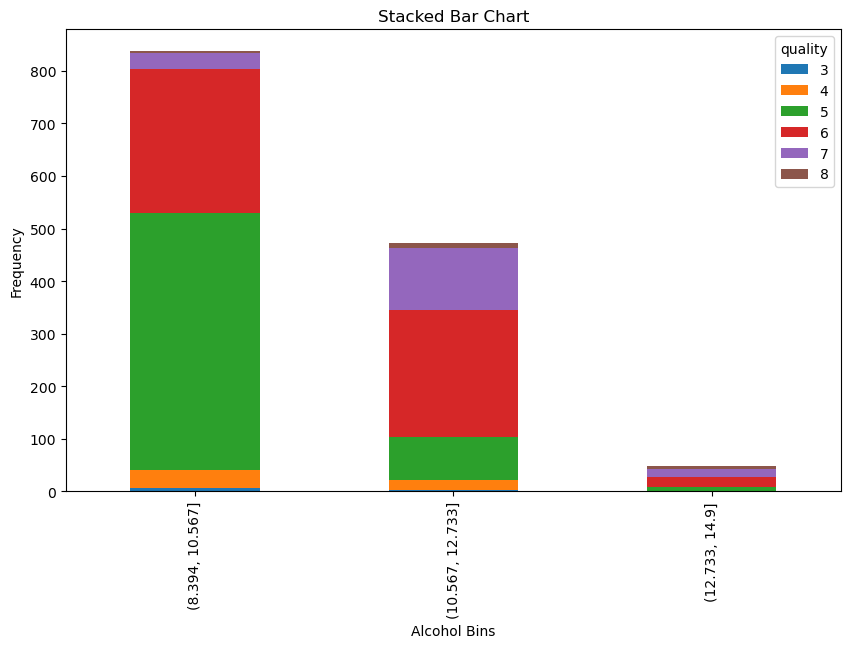

In [38]:
# Example with two categorical variables: alcohol level and quality
alcohol_bins = pd.cut(df['alcohol'], bins=3)
stacked_data = df.groupby([alcohol_bins, 'quality']).size().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart')
plt.xlabel('Alcohol Bins')
plt.ylabel('Frequency')
plt.show()


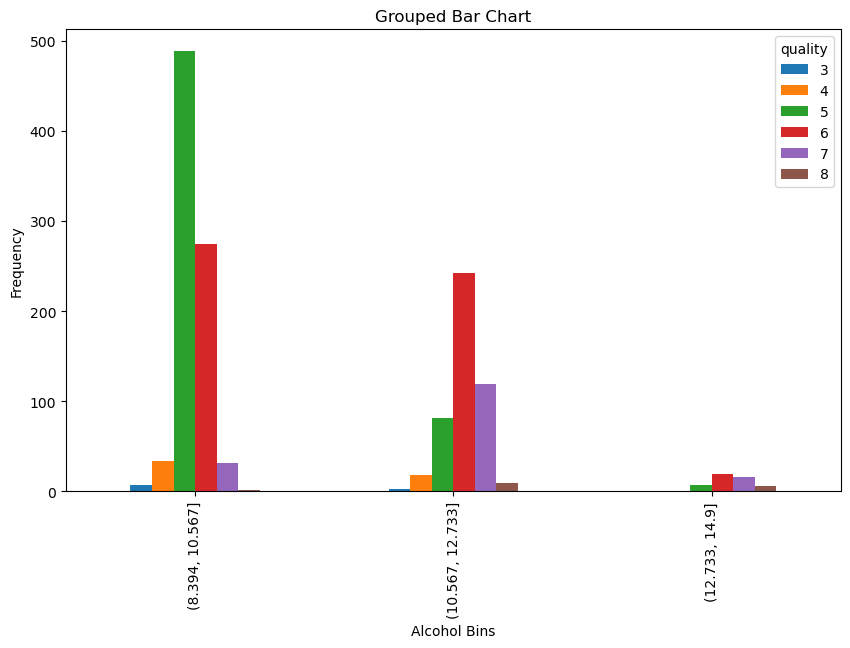

In [40]:
# Grouped Bar Chart
stacked_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Grouped Bar Chart')
plt.xlabel('Alcohol Bins')
plt.ylabel('Frequency')
plt.show()


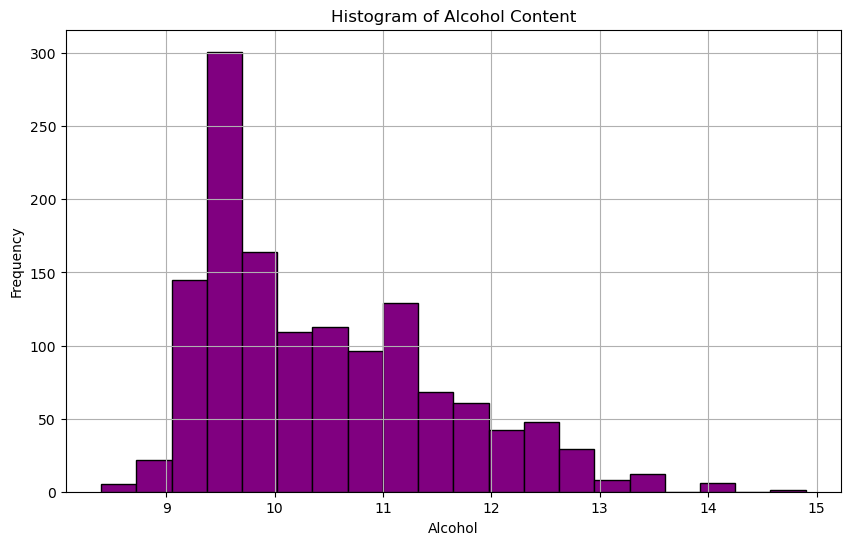

In [42]:
# Histogram
df['alcohol'].hist(bins=20, color='purple', edgecolor='black', figsize=(10, 6))
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()


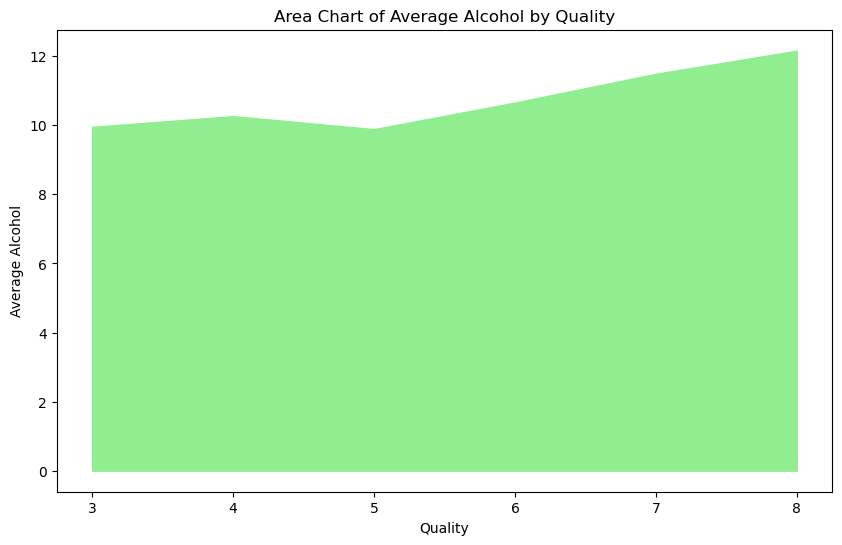

In [56]:
# Area Chart
quality_alcohol = df.groupby('quality')['alcohol'].mean()
plt.figure(figsize=(10, 6))
plt.fill_between(quality_alcohol.index, quality_alcohol, color='lightgreen')
plt.title('Area Chart of Average Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol')
plt.show()

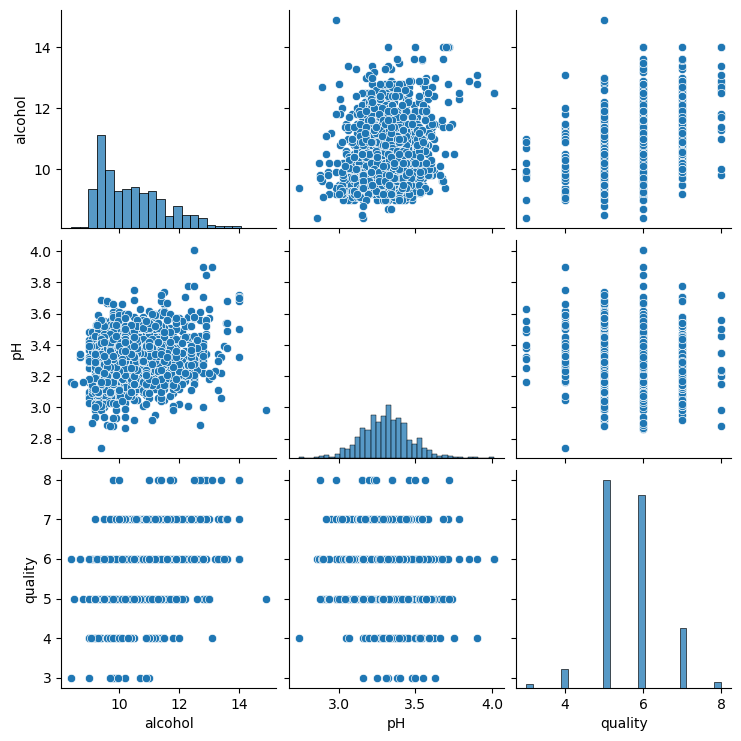

In [60]:
# Pair Plot
sns.pairplot(df, vars=['alcohol', 'pH', 'quality'])
plt.show()

C:\Users\Ashvita Yadav\AppData\Local\Temp\ipykernel_29040\3244753730.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'], shade=True, color='blue')


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

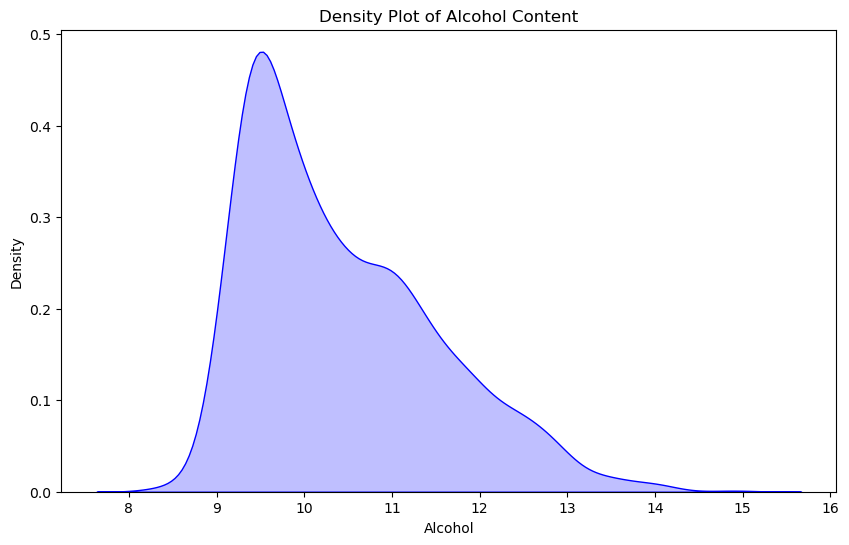

In [72]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['alcohol'], shade=True, color='blue')
plt.title('Density Plot of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel
